In [1]:
!pip install squarify

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


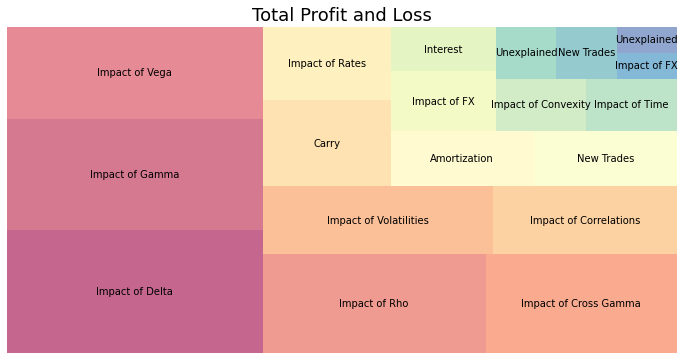

In [2]:
import matplotlib.pyplot as plt
import squarify

# Define the size of each rectangle, which corresponds to the 'value' of each factor.
# The actual values here are placeholders and would need to be adjusted to your data.
sizes = [20, 18, 15, 14, 12, 10, 8, 7, 6, 5, 5, 4, 3, 3, 3, 2, 2, 1, 1]

# Define the labels for each rectangle. These should match the number of sizes.
labels = [
    "Impact of Delta", "Impact of Gamma", "Impact of Vega", "Impact of Rho", "Impact of Cross Gamma",
    "Impact of Volatilities", "Impact of Correlations", "Carry", "Impact of Rates",
    "Amortization", "New Trades", "Impact of FX", "Interest", "Impact of Convexity", 
    "Impact of Time", "Unexplained", "New Trades", "Impact of FX", "Unexplained"
]

# Define color for each rectangle
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Create a figure and a subplot
fig, ax = plt.subplots(1, figsize=(12, 6))

# Use squarify to plot the treemap
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.6)

# Remove the axes
plt.axis('off')

# Add a title
plt.title('Total Profit and Loss', fontsize=18)

# Show the plot
plt.show()

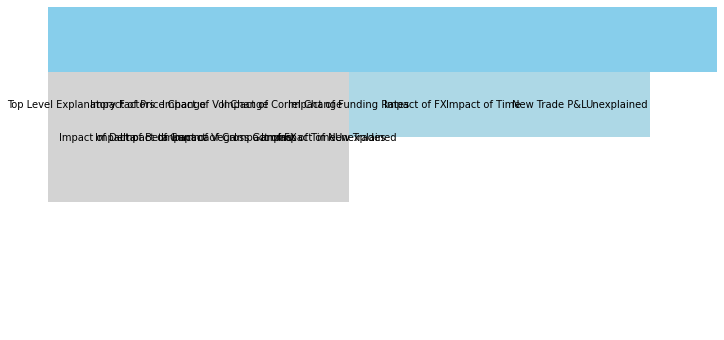

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the figure and axes
fig, ax = plt.subplots(1, figsize=(12, 6))

# Define the sizes of the top-level boxes
top_level_sizes = [0.5, 0.5]  # 50% for each top-level category
second_level_labels = [
    'Top Level Explanatory Factors', 'Impact of Price Change', 'Impact of Vol Change',
    'Impact of Correl Change', 'Impact of Funding Rates', 'Impact of FX',
    'Impact of Time', 'New Trade P&L', 'Unexplained'
]

# Starting coordinates
x, y = 0, 0.8

# Draw top-level boxes
for size in top_level_sizes:
    width = size
    height = 0.2
    ax.add_patch(patches.Rectangle((x, y), width, height, facecolor='skyblue'))
    x += width

# Reset x coordinate and set new y
x = 0
y -= height

# Draw second-level boxes
second_level_sizes = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
for i, size in enumerate(second_level_sizes):
    width = size
    height = 0.2
    ax.add_patch(patches.Rectangle((x, y), width, height, facecolor='lightblue'))
    ax.text(x + width/2, y + height/2, second_level_labels[i], ha='center', va='center')
    x += width

# Reset x coordinate and set new y
x = 0
y -= height

# Draw third-level boxes for Detailed Explanatory Factors
detailed_factors = [
    'Impact of Delta', 'Impact of Beta', 'Impact of Gamma', 'Impact of Vega',
    'Impact of Cross Gamma', 'Impact of FX', 'Impact of Time', 'Impact of New Trades', 'Unexplained'
]
third_level_sizes = [0.05] + [0.05] * (len(detailed_factors) - 1)  # Adjust these values as necessary
for size in third_level_sizes:
    width = size
    height = 0.4  # This fills the rest of the space in the figure
    ax.add_patch(patches.Rectangle((x, y), width, height, facecolor='lightgrey'))
    x += width

# Add text for Detailed Explanatory Factors
x = 0.05  # Start a bit inward from the left edge
for factor in detailed_factors:
    ax.text(x + width/2, y + height/2, factor, ha='center', va='center')
    x += width

# Set the limits of the plot
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Remove the axes
plt.axis('off')

# Show the plot
plt.show()
